# Plot the orbit of S2 from the precession rate found in [this article](https://www.aanda.org/articles/aa/abs/2020/04/aa37813-20/aa37813-20.html)


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy import units, constants
%matplotlib inline

In [141]:
#Table E.1
fSP = 1.1
fRS = 1.
MSGa = 4.261e6*units.solMass
R0 = 8246.7*units.pc
a = 125.058*units.mas
e = 0.884649
i = (134.567*units.degree).to(units.radian).value
omega = (66.263*units.degree).to(units.radian).value #argument of periapsisi
OMEGA = (228.171*units.degree).to(units.radian).value #longitude of ascending node
P = 16.0455*units.yr
tPeri = 2018.379*units.yr
x0 = -0.9*units.mas
y0 = 0.07*units.mas
vx0 = 0.08*units.mas/units.yr
vy0 = 0.0341*units.mas/units.yr
vz0 = -1.6*units.km/units.s

#calculate dphi using Eq. C.3
# RS = (2.*constants.G*MSGa/constants.c**2.).decompose() #Schwarszchild radius
# RSangle = np.arctan2(RS, R0).to(units.mas)
# dphi = 3.*fSP*np.pi*RSangle/(a*(1. - e**2.)) #I think this is the angular change in the location of periastron per orbit? but what are the units? radians per orbit?
# #is dphi meant to be applied to the argument of periapsis? https://en.wikipedia.org/wiki/Apsidal_precession
# print(RS)
# print((dphi*units.radian).to(units.arcmin))
#I get about 13.45 arcmin/orbit; and I just noticed that the paper quotes 12 arcmin/orbit in the abstract.  Well, it was a good excersize :)

dphi = (12*units.arcmin).to(units.radian).value

In [149]:
def createOrbit(semi, ecc, inc, lan, ap, tperi, period, dphi, times):
    def getPQ(b):
        c = np.cos(b)
        s = np.sin(b)

        P = np.empty(3);
        P[0] = -1.*c[2]*c[1] + s[2]*c[0]*s[1]
        P[1] = -1.*c[2]*s[1] - s[2]*c[0]*c[1]
        P[2] = -1.*s[2]*s[0]
        Q = np.empty(3);
        Q[0] = s[2]*c[1] + c[2]*c[0]*s[1]
        Q[1] = s[2]*s[1] - c[2]*c[0]*c[1]
        Q[2] = -1.*s[0]*c[2]
        return P, Q
    
    b = np.array([-1.*inc, lan, ap])
    dct = {"x":[], "y":[], "z":[], "t":[]}
    for t in times:
        tdiff = t - tperi
        phase = (tdiff % period)/period
        
        b[2] = ap + dphi*(tdiff/period)
        P, Q = getPQ(b)
        
        E = ((2.*phase*np.pi) % (2.*np.pi)).value
        pos = semi*( (np.cos(E) - ecc)*P + np.sqrt(1.0 - ecc**2.)*np.sin(E)*Q )
        
        dct["x"].append(pos[0].value)
        dct["y"].append(pos[1].value)
        dct["z"].append(pos[2].value)
        dct["t"].append(t.value)

    
    return pd.DataFrame(dct)


In [150]:
Nperiods = 100
Nvals = 100*Nperiods
times = np.linspace(2020, 2020 + Nperiods*P.value, Nvals)*units.yr

orbit = createOrbit(a, e, i, OMEGA, omega, tPeri, P, dphi, times)
orbit

,x,y,z,t
0,-21.260326,-28.817724,3.428362,2020.000000
1,-26.040945,-30.698880,1.085554,2020.160471
2,-31.044979,-32.402279,-1.546617,2020.320942
3,-36.252648,-33.921163,-4.457766,2020.481413
4,-41.643374,-35.249503,-7.636405,2020.641884
5,-47.195853,-36.382025,-11.069989,2020.802355
6,-52.888143,-37.314229,-14.744968,2020.962826
7,-58.697751,-38.042406,-18.646836,2021.123297
8,-64.601721,-38.563656,-22.760192,2021.283768
9,-70.576725,-38.875896,-27.068797,2021.444239


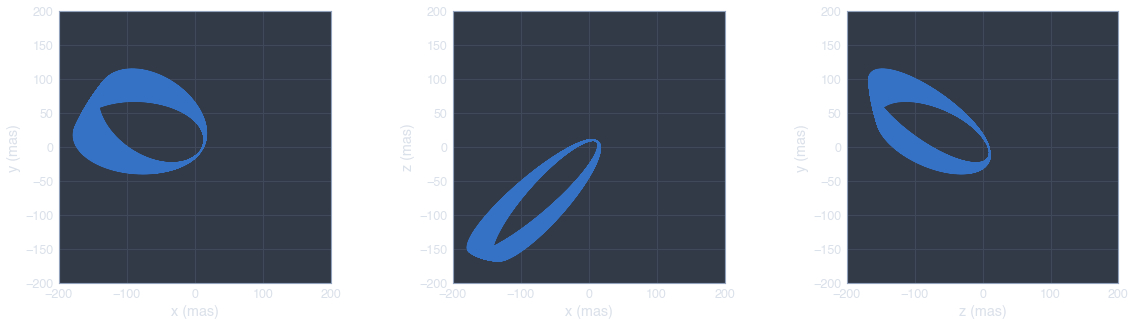

In [151]:
f,ax = plt.subplots(1,3, figsize=(20, 5))

ax[0].plot(orbit["x"], orbit["y"])
ax[0].set_xlabel('x (mas)')
ax[0].set_ylabel('y (mas)')

ax[1].plot(orbit["x"], orbit["z"])
ax[1].set_xlabel('x (mas)')
ax[1].set_ylabel('z (mas)')

ax[2].plot(orbit["z"], orbit["y"])
ax[2].set_xlabel('z (mas)')
ax[2].set_ylabel('y (mas)')

for aax in ax:
    aax.set_aspect('equal')
    aax.set_xlim(-200, 200)
    aax.set_ylim(-200, 200)

In [154]:
orbit.to_csv("S2orbit.raw", sep=' ', index=False), header=False